# EDA and Gold Price Predictions

I was not in good body today, but I must still code

So, I just follow along this [link](https://www.kaggle.com/joshuaswords/eda-gold-price-prediction-prophet?select=monthly_csv.csv) but not all and combine with this [link](https://www.kaggle.com/ravillatejakumar/automate-time-series-analysis)

In [5]:
import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from textwrap import wrap
import seaborn as sns
import plotly.graph_objs as go
import plotly as py
py.offline.init_notebook_mode(connected=True)

import matplotlib.colors
import datetime as dt
import pycountry
# import geopandas


import pandas as pd
import numpy as np

background_color = '#3B5782'
other = '#144082'
color = 'white'
plt.rcParams['text.color'] = color
plt.rcParams['axes.labelcolor'] = color
plt.rcParams['xtick.color'] = color
plt.rcParams['ytick.color'] = color
plt.rcParams['font.family'] = 'monospace'

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.float_format = '{:,}'.format

from matplotlib.offsetbox import AnnotationBbox, OffsetImage
def offset_png(x, y, path, ax, zoom, offset):
    img = plt.imread(path)
    im = OffsetImage(img, zoom=zoom)
    im.image.axes = ax
    x_offset = offset
    ab = AnnotationBbox(im, (x, y), xybox=(x_offset, 0), frameon=False,
                       xycoords='data', boxcoords='offset points', pad=0)
    ax.add_artist(ab)

data\annual_csv.csv
data\BrentOilPrices.csv
data\free-rocket.png
data\monthly_csv.csv


In [19]:
df = pd.read_csv('data/monthly_csv.csv')

df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df['Year'], df['Month'], = df['Date'].dt.year, df['Date'].dt.month

df['% Change'] = df['Price'].pct_change()

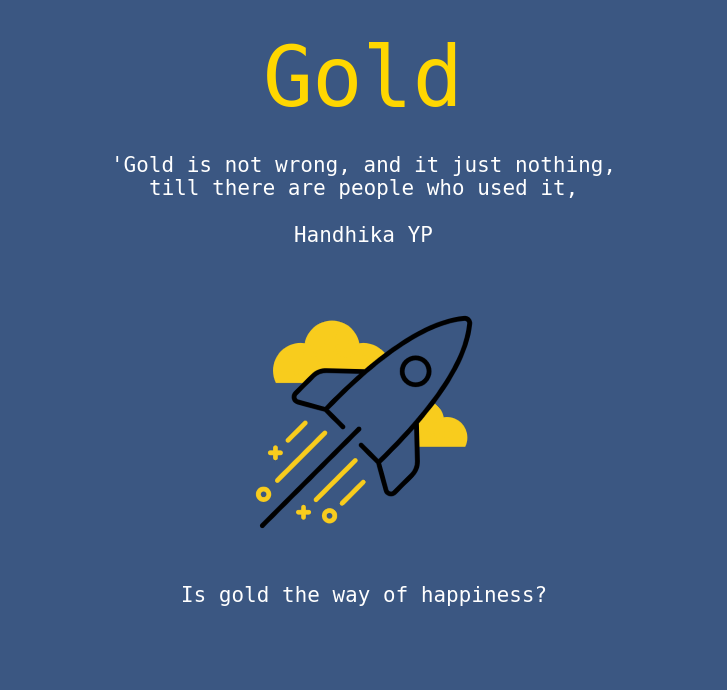

In [20]:
fig = plt.figure(figsize=(6,4), dpi=150, facecolor=background_color)
gs = fig.add_gridspec(1,1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0,0])
ax0.set_facecolor(background_color)

for s in ['right', 'top', 'bottom', 'left']:
    ax0.spines[s].set_visible(False)
    
for s in ['left', 'bottom']:
    ax0.spines[s].set_color('white')
    
ax0.tick_params(axis='both', which='both', left=False, bottom=False)
ax0.axes.get_xaxis().set_visible(False)
ax0.axes.get_yaxis().set_visible(False)

ax0.text(0.5, 0.8, "Gold", fontsize=40, color='gold', ha='center')

ax0.text(0.5, 0.5, "'Gold is not wrong, and it just nothing,\ntill there are people who used it,\n\nHandhika YP", ha='center')

path = 'data/free-rocket.png'
offset_png(x=0.5, y=0.1, path=path, ax=ax0, zoom=0.23, offset=0)

ax0.text(0.5, -0.45, "Is gold the way of happiness?\n\n\n", ha='center')

plt.show()


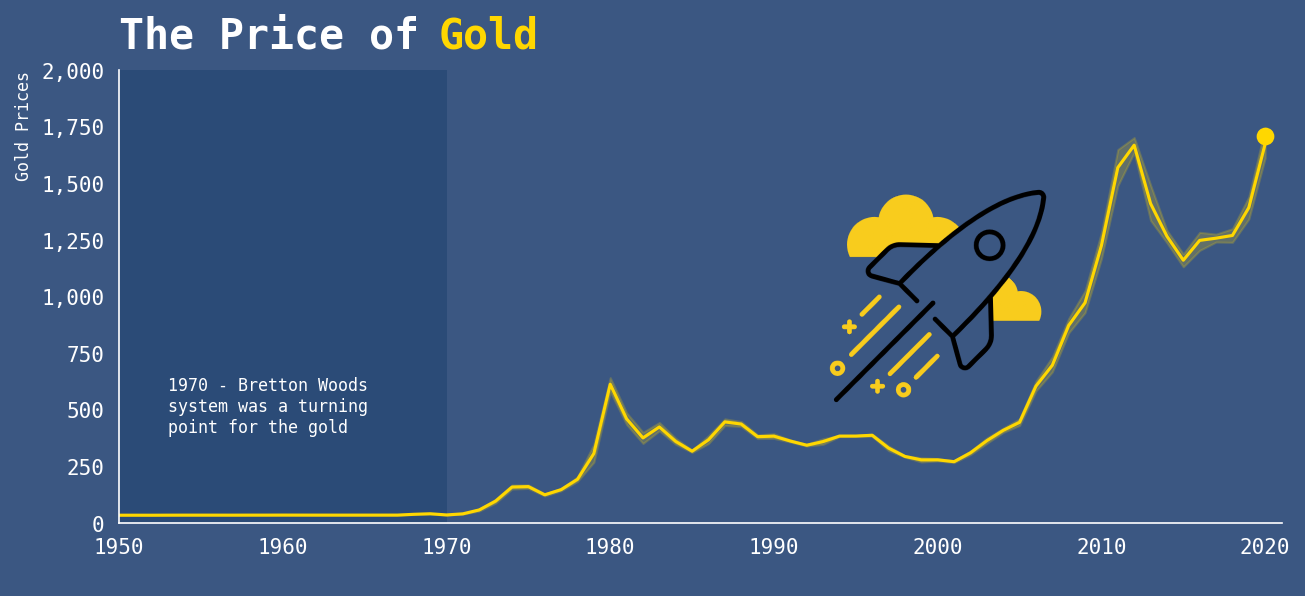

In [25]:
fig = plt.figure(figsize=(10,4), dpi=150, facecolor=background_color)
gs = fig.add_gridspec(1,1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0,0])
ax0.set_facecolor(background_color)

sns.lineplot(x='Year', y='Price', data=df, color='gold', ax=ax0)

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.set_ylim([0,2000])
ax0.set_xlim([1950,2021])
ax0.set_ylabel('Gold Prices', fontsize=8, loc='top', fontfamily='monospace')
ax0.set_xlabel(' ', fontsize=8, loc='left', fontfamily='arial')
ax0.tick_params(axis='both', which='both', left=False, bottom=False)
ax0.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
    
for s in ['left', 'bottom']:
    ax0.spines[s].set_color('white')
    
ax0.axvspan(1950, 1970, facecolor='#09305E', alpha=0.3)

ax0.text(1950, 2100, 'The Price of', fontsize=20, fontweight='bold')
ax0.text(1969.5, 2100, 'Gold', color='gold', fontsize=20, fontweight='bold')

path = 'data/free-rocket.png'
offset_png(x=2000, y=1000, path=path, ax=ax0, zoom=0.23, offset=0)

ax0.plot(2020, df['Price'].max()-130, 'ko', markersize=7, fillstyle='full', color='gold', markeredgewidth=1.5)

ax0.text(1953, 400, """1970 - Bretton Woods 
system was a turning 
point for the gold""", fontsize=8)

plt.show()

## Auto Time Series (AutoTS)

In [26]:
from AutoTS.AutoTS import AutoTS

In [27]:
df = pd.read_csv('data/annual_csv.csv', parse_dates=['Date'])

In [28]:
df

,Date,Price
0,1950-12-01,34.72
1,1951-12-01,34.66
2,1952-12-01,34.79
3,1953-12-01,34.85
4,1954-12-01,35.04
...,...,...
65,2015-12-01,"1,068.317"
66,2016-12-01,"1,152.165"
67,2017-12-01,"1,265.674"
68,2018-12-01,"1,249.887"


In [29]:
df.index = df['Date']
df

,Date,Price
Date,,
1950-12-01,1950-12-01,34.72
1951-12-01,1951-12-01,34.66
1952-12-01,1952-12-01,34.79
1953-12-01,1953-12-01,34.85
1954-12-01,1954-12-01,35.04
...,...,...
2015-12-01,2015-12-01,"1,068.317"
2016-12-01,2016-12-01,"1,152.165"
2017-12-01,2017-12-01,"1,265.674"


In [32]:
model = AutoTS()
model.fit(df, series_column_name='Price')

In [34]:
model.predict(start=pd.to_datetime('2020-12-01'), end=pd.to_datetime('2050-12-01'))

2020-12-01    1,504.353670711453
2021-12-01    1,530.827579129064
2022-12-01   1,557.3014875466745
2023-12-01    1,583.775395964285
2024-12-01   1,610.2493043818959
2025-12-01   1,636.7232127995064
2026-12-01    1,663.197121217117
2027-12-01   1,689.6710296347278
2028-12-01   1,716.1449380523384
2029-12-01    1,742.618846469949
2030-12-01   1,769.0927548875597
2031-12-01   1,795.5666633051703
2032-12-01    1,822.040571722781
2033-12-01   1,848.5144801403917
2034-12-01   1,874.9883885580023
2035-12-01   1,901.4622969756128
2036-12-01   1,927.9362053932236
2037-12-01   1,954.4101138108342
2038-12-01   1,980.8840222284448
2039-12-01   2,007.3579306460556
2040-12-01   2,033.8318390636662
2041-12-01   2,060.3057474812767
2042-12-01   2,086.7796558988875
2043-12-01   2,113.2535643164983
2044-12-01   2,139.7274727341087
2045-12-01   2,166.2013811517195
2046-12-01   2,192.6752895693303
2047-12-01   2,219.1491979869406
2048-12-01   2,245.6231064045514
2049-12-01   2,272.0970148221622
2050-12-01